In [ ]:
# Team 1 LendingClub primary notebook
# import dependencies
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.stats import linregress

# pull in all csvs and merge them into a single dataframe
bigdf = pd.concat([pd.read_csv(f, low_memory=False, usecols=['loan_amnt','term','int_rate',
                                                             'installment','emp_length','home_ownership',
                                                             'annual_inc','issue_d','open_acc',
                                                            ]) for f in glob.glob('data/LoanStats*.csv')], ignore_index=True)

In [88]:
#Assigning month numbers for merging for loan data

bigdf["month_num"] = ""
bigdf.loc[bigdf['issue_d'].str[:3] == "Dec", ('month_num')] = (12)
bigdf.loc[bigdf['issue_d'].str[:3] == "Nov", ('month_num')] = (11)
bigdf.loc[bigdf['issue_d'].str[:3] == "Oct", ('month_num')] = (10)
bigdf.loc[bigdf['issue_d'].str[:3] == "Sep", ('month_num')] = (9)
bigdf.loc[bigdf['issue_d'].str[:3] == "Aug", ('month_num')] = (8)
bigdf.loc[bigdf['issue_d'].str[:3] == "Jul", ('month_num')] = (7)
bigdf.loc[bigdf['issue_d'].str[:3] == "Jun", ('month_num')] = (6)
bigdf.loc[bigdf['issue_d'].str[:3] == "May", ('month_num')] = (5)
bigdf.loc[bigdf['issue_d'].str[:3] == "Apr", ('month_num')] = (4)
bigdf.loc[bigdf['issue_d'].str[:3] == "Mar", ('month_num')] = (3)
bigdf.loc[bigdf['issue_d'].str[:3] == "Feb", ('month_num')] = (2)
bigdf.loc[bigdf['issue_d'].str[:3] == "Jan", ('month_num')] = (1)
bigdf.loc[bigdf['issue_d'].str[:3] == "", ('month_num')] = (0)

In [89]:
#First 5 rows of Loan data
bigdf.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,issue_d,open_acc,month_num
0,30000.0,36 months,7.34%,930.99,3 years,OWN,95000.0,Mar-18,10.0,3
1,34825.0,60 months,12.61%,785.45,2 years,MORTGAGE,125000.0,Mar-18,12.0,3
2,2600.0,36 months,7.96%,81.43,3 years,MORTGAGE,62000.0,Mar-18,8.0,3
3,20000.0,60 months,9.92%,424.16,3 years,MORTGAGE,110000.0,Mar-18,9.0,3
4,17000.0,60 months,20.39%,454.10,10+ years,RENT,52000.0,Mar-18,9.0,3


In [90]:
#Readig in VIX data
mydf= pd.read_csv('T Part/VIX.csv')
mydf

,issue_d,Open,High,Low,Close,Adj Close
0,1-Jan,10.950000,15.420000,8.92,13.540000,13.540000
1,1-Feb,13.050000,50.299999,12.50,19.850000,19.850000
2,1-Mar,19.959999,26.219999,13.31,19.969999,19.969999
3,1-Apr,21.070000,25.719999,14.57,15.930000,15.930000
4,1-May,16.000000,18.780001,10.91,15.430000,15.430000
5,1-Jun,14.920000,19.610001,11.22,16.090000,16.090000
6,1-Jul,17.700001,18.080000,11.44,12.830000,12.830000
7,1-Aug,13.090000,16.860001,10.17,12.860000,12.860000
8,1-Sep,13.130000,15.630000,11.10,12.120000,12.120000
9,1-Oct,11.990000,28.840000,11.34,21.230000,21.230000


In [91]:
#Assigning month numbers for merging for VIX data
mydf["month_num"] = ""
mydf.loc[mydf['issue_d'].str[2:] == "Dec", ('month_num')] = (12)
mydf.loc[mydf['issue_d'].str[2:] == "Nov", ('month_num')] = (11)
mydf.loc[mydf['issue_d'].str[2:] == "Oct", ('month_num')] = (10)
mydf.loc[mydf['issue_d'].str[2:] == "Sep", ('month_num')] = (9)
mydf.loc[mydf['issue_d'].str[2:] == "Aug", ('month_num')] = (8)
mydf.loc[mydf['issue_d'].str[2:] == "Jul", ('month_num')] = (7)
mydf.loc[mydf['issue_d'].str[2:] == "Jun", ('month_num')] = (6)
mydf.loc[mydf['issue_d'].str[2:] == "May", ('month_num')] = (5)
mydf.loc[mydf['issue_d'].str[2:] == "Apr", ('month_num')] = (4)
mydf.loc[mydf['issue_d'].str[2:] == "Mar", ('month_num')] = (3)
mydf.loc[mydf['issue_d'].str[2:] == "Feb", ('month_num')] = (2)
mydf.loc[mydf['issue_d'].str[2:] == "Jan", ('month_num')] = (1)
mydf.loc[mydf['issue_d'].str[2:] == "", ('month_num')] = (0)

In [92]:
#Ensuring that we are only using 2018 data for VIX
cleanmydf= mydf.dropna()
cleanmydf

,issue_d,Open,High,Low,Close,Adj Close,month_num
0,1-Jan,10.950000,15.420000,8.92,13.540000,13.540000,1
1,1-Feb,13.050000,50.299999,12.50,19.850000,19.850000,2
2,1-Mar,19.959999,26.219999,13.31,19.969999,19.969999,3
3,1-Apr,21.070000,25.719999,14.57,15.930000,15.930000,4
4,1-May,16.000000,18.780001,10.91,15.430000,15.430000,5
5,1-Jun,14.920000,19.610001,11.22,16.090000,16.090000,6
6,1-Jul,17.700001,18.080000,11.44,12.830000,12.830000,7
7,1-Aug,13.090000,16.860001,10.17,12.860000,12.860000,8
8,1-Sep,13.130000,15.630000,11.10,12.120000,12.120000,9
9,1-Oct,11.990000,28.840000,11.34,21.230000,21.230000,10


In [93]:
#Reading in DOW Jones Data
otherdf= pd.read_csv('T Part/DJI.csv')
otherdf.dropna()

,issue_d,Open,High,Low,Close,Adj Close,Volume
0,1-Jan,24809.34961,26616.71094,24741.69922,26149.39063,26149.39063,9116920000
1,1-Feb,26083.03906,26306.69922,23360.28906,25029.19922,25029.19922,9450250000
2,1-Mar,25024.03906,25449.15039,23509.06055,24103.10938,24103.10938,8873040000
3,1-Apr,24076.59961,24858.97070,23344.51953,24163.15039,24163.15039,8064550000
4,1-May,24117.28906,25086.49023,23531.31055,24415.83984,24415.83984,7278020000
5,1-Jun,24542.08984,25402.83008,23997.21094,24271.41016,24271.41016,7411110000
6,1-Jul,24161.52930,25587.24023,24077.56055,25415.18945,25415.18945,5408500000
7,1-Aug,25461.63086,26167.93945,24965.76953,25964.82031,25964.82031,5635410000
8,1-Sep,25916.07031,26769.16016,25754.32031,26458.31055,26458.31055,5262500000
9,1-Oct,26598.35938,26951.81055,24122.23047,25115.75977,25115.75977,8373350000


In [94]:
#Assigning month numbers for merging for DOW data
otherdf["month_num"] = ""
otherdf.loc[otherdf['issue_d'].str[2:] == "Dec", ('month_num')] = (12)
otherdf.loc[otherdf['issue_d'].str[2:] == "Nov", ('month_num')] = (11)
otherdf.loc[otherdf['issue_d'].str[2:] == "Oct", ('month_num')] = (10)
otherdf.loc[otherdf['issue_d'].str[2:] == "Sep", ('month_num')] = (9)
otherdf.loc[otherdf['issue_d'].str[2:] == "Aug", ('month_num')] = (8)
otherdf.loc[otherdf['issue_d'].str[2:] == "Jul", ('month_num')] = (7)
otherdf.loc[otherdf['issue_d'].str[2:] == "Jun", ('month_num')] = (6)
otherdf.loc[otherdf['issue_d'].str[2:] == "May", ('month_num')] = (5)
otherdf.loc[otherdf['issue_d'].str[2:] == "Apr", ('month_num')] = (4)
otherdf.loc[otherdf['issue_d'].str[2:] == "Mar", ('month_num')] = (3)
otherdf.loc[otherdf['issue_d'].str[2:] == "Feb", ('month_num')] = (2)
otherdf.loc[otherdf['issue_d'].str[2:] == "Jan", ('month_num')] = (1)
otherdf.loc[otherdf['issue_d'].str[2:] == "", ('month_num')] = (0)

In [95]:
#First 5 rows of Dow data
otherdf.head()

,issue_d,Open,High,Low,Close,Adj Close,Volume,month_num
0,1-Jan,24809.34961,26616.71094,24741.69922,26149.39063,26149.39063,9116920000,1
1,1-Feb,26083.03906,26306.69922,23360.28906,25029.19922,25029.19922,9450250000,2
2,1-Mar,25024.03906,25449.15039,23509.06055,24103.10938,24103.10938,8873040000,3
3,1-Apr,24076.59961,24858.97070,23344.51953,24163.15039,24163.15039,8064550000,4
4,1-May,24117.28906,25086.49023,23531.31055,24415.83984,24415.83984,7278020000,5


In [96]:
#Merged Loan data with Vix data
merged_df = bigdf.merge(cleanmydf,how = "inner",on = "month_num")
new_merged_df= merged_df.drop(['Close','issue_d_x','issue_d_y','installment'],axis = 1)
pd.DataFrame(new_merged_df).head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,open_acc,month_num,Open,High,Low,Adj Close
0,30000.0,36 months,7.34%,3 years,OWN,95000.0,10.0,3,19.959999,26.219999,13.31,19.969999
1,34825.0,60 months,12.61%,2 years,MORTGAGE,125000.0,12.0,3,19.959999,26.219999,13.31,19.969999
2,2600.0,36 months,7.96%,3 years,MORTGAGE,62000.0,8.0,3,19.959999,26.219999,13.31,19.969999
3,20000.0,60 months,9.92%,3 years,MORTGAGE,110000.0,9.0,3,19.959999,26.219999,13.31,19.969999
4,17000.0,60 months,20.39%,10+ years,RENT,52000.0,9.0,3,19.959999,26.219999,13.31,19.969999


In [97]:
#Made int_rate column from string to float 
new_merged_df['int_rate'] = new_merged_df['int_rate'].str[:-1].astype(float)
new_merged_df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,open_acc,month_num,Open,High,Low,Adj Close
0,30000.0,36 months,7.34,3 years,OWN,95000.0,10.0,3,19.959999,26.219999,13.31,19.969999
1,34825.0,60 months,12.61,2 years,MORTGAGE,125000.0,12.0,3,19.959999,26.219999,13.31,19.969999
2,2600.0,36 months,7.96,3 years,MORTGAGE,62000.0,8.0,3,19.959999,26.219999,13.31,19.969999
3,20000.0,60 months,9.92,3 years,MORTGAGE,110000.0,9.0,3,19.959999,26.219999,13.31,19.969999
4,17000.0,60 months,20.39,10+ years,RENT,52000.0,9.0,3,19.959999,26.219999,13.31,19.969999


In [98]:
#Grouping data by months
Jan = new_merged_df[new_merged_df["month_num"] == 1]
Feb = new_merged_df[new_merged_df["month_num"] == 2]
Mar = new_merged_df[new_merged_df["month_num"] == 3]
Apr = new_merged_df[new_merged_df["month_num"] == 4]
May = new_merged_df[new_merged_df["month_num"] == 5]
Jun = new_merged_df[new_merged_df["month_num"] == 6]
Jul = new_merged_df[new_merged_df["month_num"] == 7]
Aug = new_merged_df[new_merged_df["month_num"] == 8]
Sept = new_merged_df[new_merged_df["month_num"] == 9]
Oct = new_merged_df[new_merged_df["month_num"] == 10]
Nov = new_merged_df[new_merged_df["month_num"] == 11]
Dec = new_merged_df[new_merged_df["month_num"] == 12]
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May','June','July','Aug','Sept','Oct','Nov',"Dec"]
Months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'June',
 'July',
 'Aug',
 'Sept',
 'Oct',
 'Nov',
 'Dec']

In [99]:
#Ensuring that data is grouped
Jan.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,open_acc,month_num,Open,High,Low,Adj Close
71517,6500.0,36 months,7.97,10+ years,MORTGAGE,24000.0,5.0,1,10.95,15.42,8.92,13.54
71518,13200.0,36 months,5.32,4 years,OWN,85000.0,7.0,1,10.95,15.42,8.92,13.54
71519,30000.0,36 months,16.02,10+ years,MORTGAGE,75000.0,17.0,1,10.95,15.42,8.92,13.54
71520,4500.0,36 months,6.08,10+ years,RENT,36000.0,23.0,1,10.95,15.42,8.92,13.54
71521,8000.0,36 months,21.45,6 years,MORTGAGE,34000.0,11.0,1,10.95,15.42,8.92,13.54


In [122]:
#Create object to store number of loans
Number_of_loans= [len(Jan),len(Feb),len(Mar),len(Apr),
                  len(May),len(Jun),len(Jul),len(Aug),
                 len(Sept),len(Oct),len(Nov),len(Dec)]
#Making sure it works
Number_of_loans

[36347,
 32746,
 38771,
 42928,
 46311,
 41533,
 43089,
 46079,
 39026,
 46305,
 41973,
 40134]

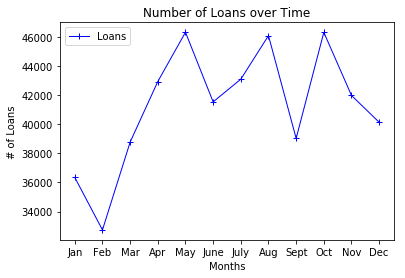

In [102]:
#Created Chart to show number of loans in 2018
Loans_to_Time = plt.plot(Months, Number_of_loans, marker="+",color="blue", linewidth=1, label="Loans")
plt.title("Number of Loans over Time")
plt.legend(loc="best")
plt.xlabel("Months")
plt.ylabel("# of Loans")
plt.savefig("T Part/Loans to Time.png")

In [103]:
#Created object to store the average interest rate each month
interest_rate_mean = [Jan["int_rate"].mean(),Feb["int_rate"].mean(),Mar["int_rate"].mean(),
                     Apr["int_rate"].mean(),May["int_rate"].mean(),Jun["int_rate"].mean(),
                     Jul["int_rate"].mean(),Aug["int_rate"].mean(),Sept["int_rate"].mean(),
                     Oct["int_rate"].mean(),Nov["int_rate"].mean(),Dec["int_rate"].mean()]
interest_rate_mean

[12.385711337935462,
 12.460560984546227,
 12.431085605220568,
 12.531480851658856,
 12.585767528233356,
 12.561177136255585,
 13.08095267933704,
 12.988853056705207,
 12.78003561727931,
 12.750407731344968,
 13.081794010433915,
 12.980793342302016]

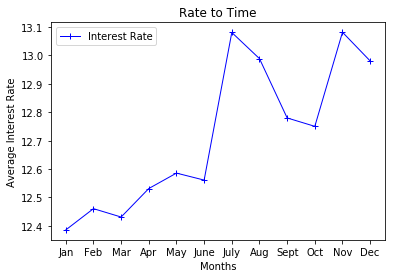

In [104]:
#Chart comparing the average interest rate over 2018
Interest_to_Time = plt.plot(Months, interest_rate_mean, marker="+",color="blue", linewidth=1, label="Interest Rate")
plt.title("Rate to Time")
plt.legend(loc="best")
plt.xlabel("Months")
plt.ylabel("Average Interest Rate")
plt.savefig("T Part/InterestRatetoTime.png")

In [105]:
#Object containing the sum of the loans given out
total_loans_in_dollars = [Jan["loan_amnt"].sum(),Feb["loan_amnt"].sum(),Mar["loan_amnt"].sum(),
                     Apr["loan_amnt"].sum(),May["loan_amnt"].sum(),Jun["loan_amnt"].sum(),
                     Jul["loan_amnt"].sum(),Aug["loan_amnt"].sum(),Sept["loan_amnt"].sum(),
                     Oct["loan_amnt"].sum(),Nov["loan_amnt"].sum(),Dec["loan_amnt"].sum()]
total_loans_in_dollars

[584275125.0,
 533093100.0,
 624413475.0,
 685339900.0,
 733698150.0,
 661391150.0,
 688012100.0,
 739736100.0,
 635394775.0,
 746131475.0,
 666934725.0,
 637843075.0]

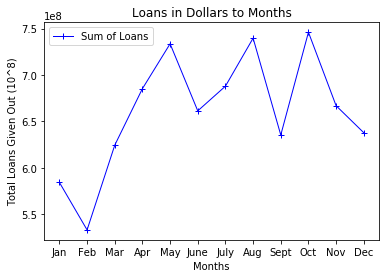

In [106]:
#Chart showing the sum of the loans given out
Loans_in_dollars_to_Time = plt.plot(Months, total_loans_in_dollars, marker="+",color="blue", linewidth=1, 
                                    label="Sum of Loans")
plt.title("Loans in Dollars to Months")
plt.legend(loc="best")
plt.xlabel("Months")
plt.ylabel("Total Loans Given Out (10^8)")
plt.savefig("T Part/Loans in Dollars.png")

In [107]:
#List containing the Adjusted Close of the DOW
close = otherdf["Adj Close"]
close

0     26149.39063
1     25029.19922
2     24103.10938
3     24163.15039
4     24415.83984
5     24271.41016
6     25415.18945
7     25964.82031
8     26458.31055
9     25115.75977
10    25538.46094
11    23327.46094
Name: Adj Close, dtype: float64

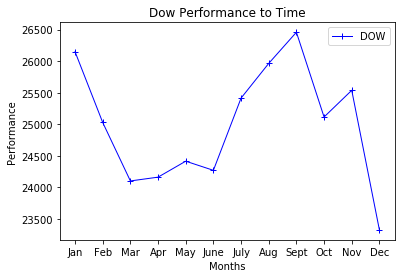

In [108]:
#Create chart showing performance of the DOW
dow = plt.plot(Months, close, marker="+",color="blue", linewidth=1, label="DOW")
plt.title("Dow Performance to Time")
plt.legend(loc="best")
plt.xlabel("Months")
plt.ylabel("Performance")
plt.savefig("T Part/DOW.png")

In [109]:
#Create a list showing the adjusted close of the VIX
vix= cleanmydf["Adj Close"]
vix

0     13.540000
1     19.850000
2     19.969999
3     15.930000
4     15.430000
5     16.090000
6     12.830000
7     12.860000
8     12.120000
9     21.230000
10    18.070000
11    25.420000
Name: Adj Close, dtype: float64

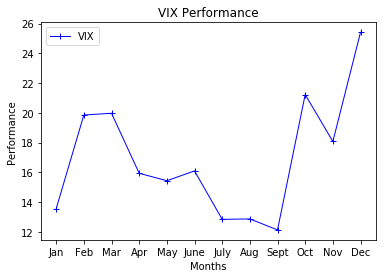

In [110]:
#Create chart showing performance of the VIX
vix_data = plt.plot(Months, vix, marker="+",color="blue", linewidth=1, label="VIX")
plt.title("VIX Performance")
plt.legend(loc="best")
plt.xlabel("Months")
plt.ylabel("Performance")
plt.savefig("T Part/VIX.png")
plt.show()

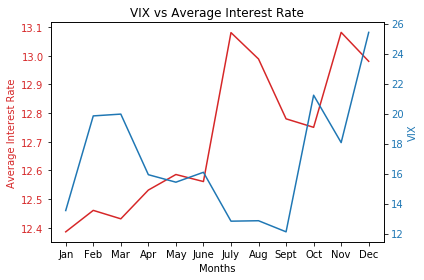

In [111]:
#Comparing VIX vs the Average interest rate
fig, ax1 = plt.subplots()
plt.title("VIX vs Average Interest Rate")
color = 'tab:red'
ax1.set_xlabel('Months')
ax1.set_ylabel('Average Interest Rate', color=color)
ax1.plot(Months, interest_rate_mean, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('VIX', color=color) 
ax2.plot(Months, vix, color=color)
ax2.tick_params(axis='y', labelcolor=color)


#ax3 = ax1.twinx()
#color = 'tab:green'
#ax3.set_ylabel('DOW', color=color)  
#ax3.plot(Months, close, color=color)
#ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

In [112]:
linregress(interest_rate_mean,vix)

LinregressResult(slope=-0.11320857897822734, intercept=18.3848113401979, rvalue=-0.00726223705502408, pvalue=0.982129345192641, stderr=4.929438642803593)

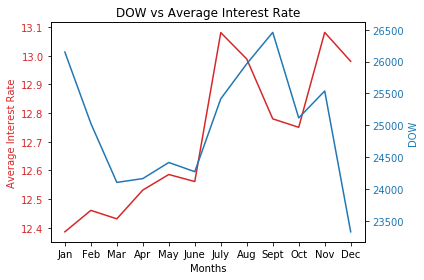

In [113]:
#Chart comparing DOW to average interest rate
fig, ax1 = plt.subplots()
plt.title("DOW vs Average Interest Rate")
color = 'tab:red'
ax1.set_xlabel('Months')
ax1.set_ylabel('Average Interest Rate', color=color)
ax1.plot(Months, interest_rate_mean, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('DOW', color=color)
ax2.plot(Months, close, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [114]:
linregress(interest_rate_mean,close)

LinregressResult(slope=639.7633122522906, intercept=16859.35898444972, rvalue=0.17463323953839355, pvalue=0.5872409105467207, stderr=1140.6884694661967)

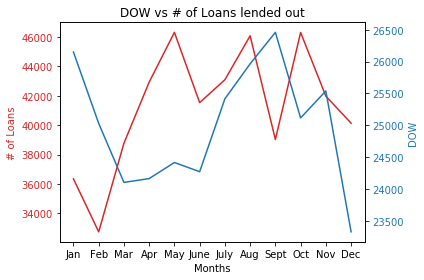

In [115]:
#Chart comparing DOW to average interest rate
fig, ax1 = plt.subplots()
plt.title("DOW vs # of Loans lended out")
color = 'tab:red'
ax1.set_xlabel('Months')
ax1.set_ylabel('# of Loans', color=color)
ax1.plot(Months, Number_of_loans, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('DOW', color=color)
ax2.plot(Months, close, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [116]:
linregress(Number_of_loans,close)

LinregressResult(slope=-0.016875177918421656, intercept=25692.449870222918, rvalue=-0.0734452776586237, pvalue=0.8205494300431684, stderr=0.07246194302053516)

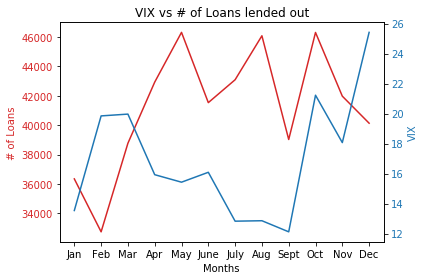

In [117]:
#Chart comparing VIX to # of Loans lended out
fig, ax1 = plt.subplots()
plt.title("VIX vs # of Loans lended out")
color = 'tab:red'
ax1.set_xlabel('Months')
ax1.set_ylabel('# of Loans', color=color)
ax1.plot(Months, Number_of_loans, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('VIX', color=color)
ax2.plot(Months, vix, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [118]:
linregress(Number_of_loans,vix)

LinregressResult(slope=-0.0001509039211575402, intercept=23.172829893491873, rvalue=-0.1543474804621381, pvalue=0.6319700236890077, stderr=0.00030546765682821413)

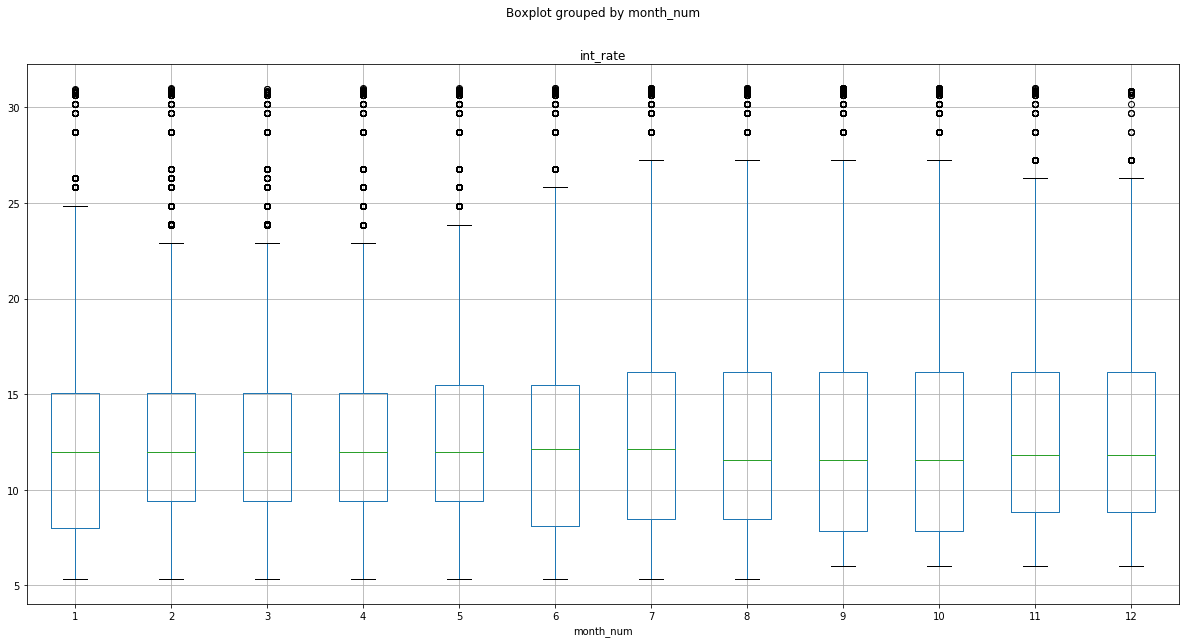

In [120]:
#Boxplot showing the spread of the interest rates by month
new_merged_df.boxplot("int_rate", by="month_num", figsize=(20, 10))

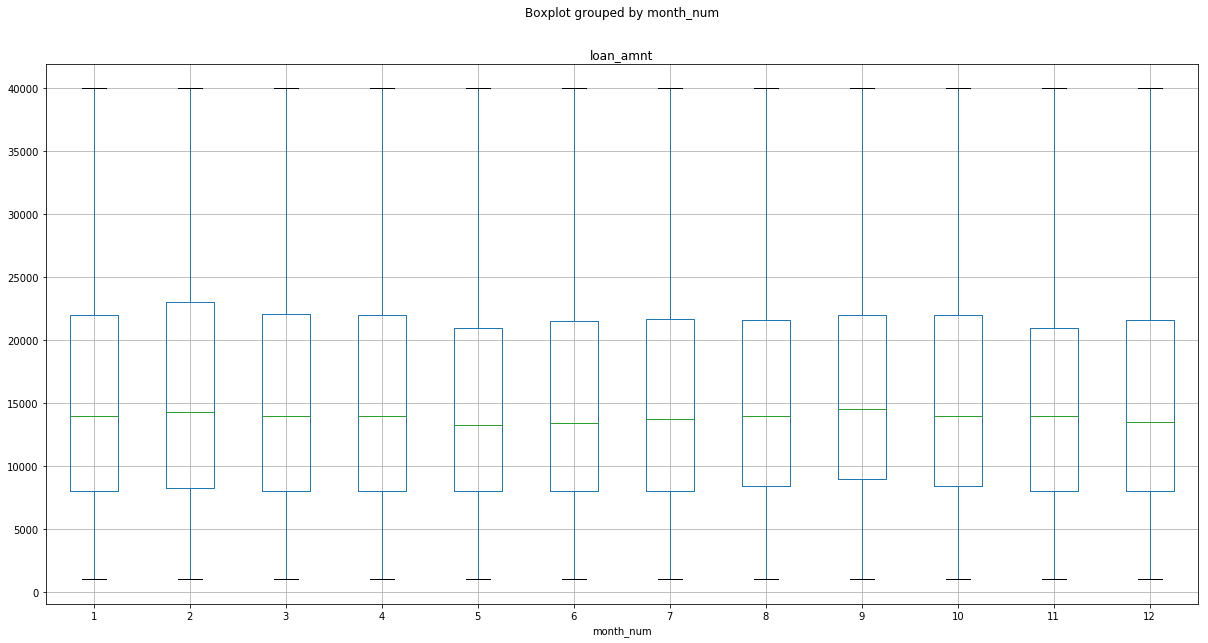

In [121]:
#Boxplot showing the spread of loan amounts given
new_merged_df.boxplot("loan_amnt", by="month_num", figsize=(20, 10))